Given the non-linear ODE:

$$\frac{dy}{dx} = f(x,y) $$

with IC $y=y_0 at x=x_0$

We can actually determine whether a solution exists without attempting a solution. The following theorem holds:

**Theorem**

Let f(x,y) be a one-valued continuous function of x and y in domain $D$ defined as:

$$\mid x - x_0 \mid \le a, \mid y - y_0 \mid \le b $$

(which is a rectangle). Let $\mid f(x,y) \mid \le M$ in $D$, and let:

$$h = \min{\bigg[ a, \frac{b}{M} \bigg]} $$

If $h < a$ the redefine $D$ as:

$$\mid x - x_0 \mid \le h, \mid y - y_0 \mid \le b $$

Furthermore, let $f(x,y)$ satisfy the *Lipschitz condition*, which implies that if $(x,y)$ and $(x,Y)$ are two points in $D$, then

$$\mid f(x,y) - f(x,Y) \mid < K \mid y - Y \mid $$

where K is a constant.

With these conditions satisfied, the existence theorem ensures there *exists* a *unique continuous* function of x for all x in the range $\mid x - x_0 \mid \le h$ which satisfies the ODE

**Proof: Method of Successive Approximations aka Picard Iteration**

We won't demonstrate the whole proof, but we will show the basic method of how it is approached.

Integrate both sides wrt x:

$$\int_{y_0}^{y}{dy} = \int_{x_0}^{x}{f(t, y(t))} $$

gives

$$y(x) = y_0 + \int_{x_0}^{x}{f(t, y(t))}$$

Notice that this equation is recursive: y appears both on the lhs and within the integral:

$$y_1(x) = y_0 + \int_{x_0}^{x}{f(t, y_0)}$$
$$y_2(x) = y_0 + \int_{x_0}^{x}{f(t, y_1(t))}$$
$$y_n(x) = y_0 + \int_{x_0}^{x}{f(t, y_{n-1}(t))}$$

The proof demonstrates that: 

1. as $n \rightarrow \infty$, the sequence $y_n(x)$ tends to a continuous function in x.
2. The limit satisfies the ODE.
3. The limit function satisfies the IC.
4. It is the *only* possible solution that meets criteria 2. and 3.

This simultaneously gives us a method to find a series solution to non-linear ODEs.

## The continuous requirement

The proof itself doesn't actually require the function to be continuous. We could use a looser requirement that f(x,y) merely be bounded:

$$\int_{x_0}^{x}{\mid f(t, y(t)) \mid dt} $$

For example:

$$f(x,y) = y(1-x), x >0 $$
$$f(x,y) = y(x-1), x <0 $$

with the IC $y(0)=1$. The solution is found to be:

$$y(x) = e^{x - (x^2)/2}, x \ge 0 $$
$$y(x) = e^{(x^2)/2 - x}, x \le 0 $$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import axes3d

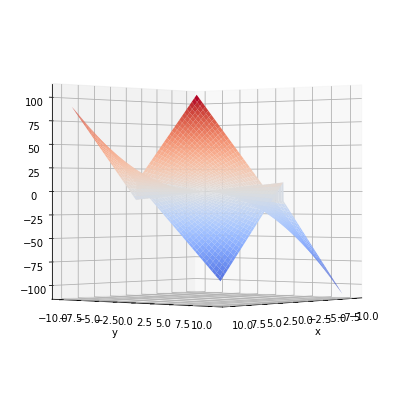

In [18]:
x = np.linspace(-10, 10, 1001)
xv, yv = np.meshgrid(x, x)

f = 0*xv
f[xv > 0] = yv[xv>0]*(1 - xv[xv>0])
f[xv < 0] = yv[xv<0]*(xv[xv<0] - 1)
#f[f>20] = 20
#f[f<-20] = -20

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, yv, f, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.view_init(elev=0, azim=40)


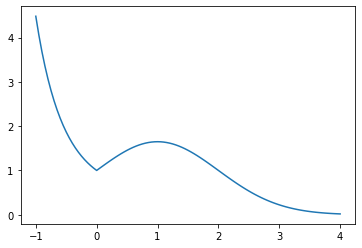

In [26]:
x = np.linspace(-1, 4, 101)
y = 0*x
y[x<0] = np.exp(x[x<0]**2/2 - x[x<0])
y[x>=0] = np.exp(x[x>=0] - x[x>=0]**2/2)

plt.plot(x,y)

## The Lipschitz condition

The Lipschitz condition, on the other hand, ensures uniqueness. For instance, if

$$\frac{dy}{dx} = 3 y^{2/3}, y(0) = 0 $$

Our function is indeed continuous. But $f(x,y)$ is not Lipschitzian in any region that includes $y=0$. 

## Example 1

We will look at two examples: one, where we take into account the domain of vailidity and one where we don't. First, let's say our given equation is:

$$\frac{dy}{dx} = y $$

with the IC $y(0) = 1$

We can easily solve to find the solution $y = e^x$.

First, does this satisfy the Lipschitz condition? Let's try two points, $f(1, 0)$ and $f(1, 10)$:

$$\mid 1 - 10 \mid < K \mid 1 - 10 \mid $$

Can we find a value of $K$ that is satisfied for all values of y? Yes! In this case, any value of K greater than 1 will satisfy this condition.

The successive approximations are given by:

$$y_j(x) = 1 + \int_{0}^{x}{y_{j-1}dt} $$
$$y_1(x) = 1 + x $$
$$y_2(x) = 1 + \int_{0}^{x}{(1 + t)dt} = 1 + x + \frac{x^2}{2} $$
$$y_3(x) = 1 + \int_{0}^{x}{(1 + t + \frac{t^2}{2})dt} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} $$

and

$$y_n(x) = \sum_{j=0}^{n}{\frac{x^j}{j!}} $$

Let's try plotting:

(0, 150)

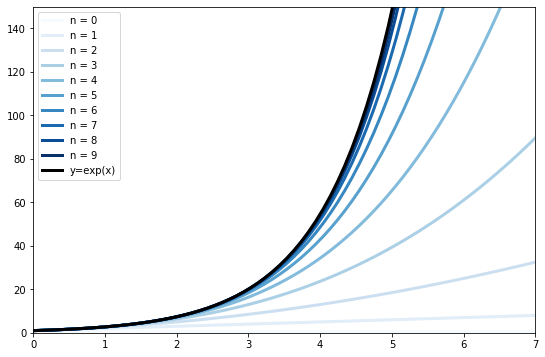

In [20]:
x = np.linspace(0, 10, 100)
y = 0*x
colors = cm.Blues(np.linspace(0, 1, 10))

fig, ax = plt.subplots(figsize=(9,6))
for i in range(10):
    y = y + x**i/np.math.factorial(i)
    ax.plot(x, y, label='n = {}'.format(i), c=colors[i], linewidth=3)

ax.plot(x, np.exp(x), label='y=exp(x)', c='k', linewidth=3)
ax.legend()
ax.set_xlim([0,7])
ax.set_ylim([0,150])

## Example 2

Consider the ODE

$$\frac{dy}{dx} = y^2, y(0)=1 $$

Construct the successive approximations and find the largest range of x for the solution.

Solving by separation of variables gives:

$$y = \frac{1}{1-x} $$

This function is continuous on the range $- \infty < x <1$, which contains the initial condition.

Checking the Lipschitz condition:

$$\mid y_1^2 - y_2^2 \mid = \mid (y_1 - y_2)(y_1 + y_2) \mid \le \mid y_1 + y_2 \mid \mid y_1 - y_2 \mid $$

We can try pushing the limits of our domain such that:

$$\mid x \mid < a = \infty, \mid y-1 \mid < b = \infty $$

But

$$ M = \max{\mid f(x,y) \mid} = \max_{\mid y-1 \mid < \infty}{y^2} = \infty $$

so that

$$h = \min{\bigg[ a, \frac{b}{M} \bigg]} = 0 $$

Then, let's define the range:

$$\mid x \mid < a, \mid y-1 \mid < b $$

To maximize the range then, we solve:

$$M = \max_{\mid y-1 \mid < b}{\mid y \mid^2} = (1 + b)^2 $$

This leads to

$$h = \min{\bigg[ a, \frac{b}{(1 + b)^2} \bigg] } $$

The function to the right attains a maximum value of 1/4 at b=1. Thus, h is maximized with the choice $a \le 1/4$ and $b=1$. The largest domain that can be constructed around (0,1) is:

$$D: \mid x \mid \le 1/4, \mid y-1 \mid \le 1 $$

The successive iterations are found to be:

$$y_1(x) = 1 + x $$
$$y_2(x) = \frac{2 + (1+x)^3}{3} $$
$$y_3(x) = 1 + \frac{1}{9}\bigg[ -1 + 4x + (1+x)^4 + \frac{(1+x)^7-1}{7} \bigg] $$

(-1, 5)

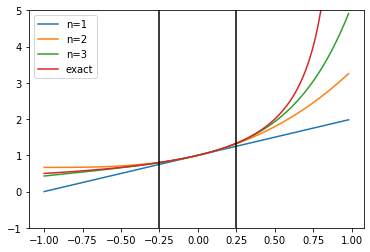

In [33]:
x = np.linspace(-1, 0.98, 100)
y1 = 1+x
y2 = (2 + (1+x)**3)/3
y3 = 1 + (-1 + 4*x + (1+x)**4 + ((1+x)**7-1)/7)/9
y = 1/(1-x)

fig, ax = plt.subplots()
ax.plot(x, y1, label='n=1')
ax.plot(x, y2, label='n=2')
ax.plot(x, y3, label='n=3')
ax.plot(x, y, label='exact')
plt.axvline(-0.25, c='k')
plt.axvline(0.25, c='k')
ax.legend()
ax.set_ylim([-1, 5])

What went wrong here? It appears that our theorem is significantly limiting the domain of the solution. True. But if we set a new set of ICs, and re-solve, we can find a new expanded domain where a valid solution exists. How far can we continue this?

**Theorem**

Let f(x,y) be continuous and bounded, and let it satisfy a Lipschitz condition in region D. Then for every $(x_0, y_0) \in D$, the ODE

$$\frac{dy}{dx} = f(x,y) $$

possesses a unique solution y(x) satisfying $y(x_0) = y_0$, which can be extended in both directions of $x_0$ until it remains finite or until its graph meets the boundary of D. 

Thus, in the case of our example, the boundaries could be extended over the region $- \infty < x < 1$. But you wouldn't know that unless we were able to solve for the solution directly. So this theorem doesn't make your life much easier atm.